<a href="https://colab.research.google.com/github/susanavillar/VISUALIZACION-DE-DATOS/blob/main/Clase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histórico de ventas: planificación


---

Susana Villar Polvorosa


**Índice**:

>[Preparación de los datos](#scrollTo=QPolS52H3SHW)

>>>[Comenzamos viendo el número de actuals y de forecasts en SCENARIO](#scrollTo=cVS9w30YIWlw)

>>>[Horizonte de precisión](#scrollTo=NxrWUTHIMES3)

>>>[Histórico de datos de actuals/forecast](#scrollTo=aOQ4jupGpa1j)

>[Preguntas que hay que responder](#scrollTo=xtz3_GNO2aam)

>>[1. Como se distribuyen las ventas realizadas:](#scrollTo=ABAL5Zt9vmQz)

>>>[Por paises](#scrollTo=PgwSUSmgHqQG)

>>>[Por cada mes y año](#scrollTo=R5CehQEPH09Y)

>>>[Cada marca](#scrollTo=xegsYN4FgSkA)

>>[2. Cual es la tendencia y estacionalidad de:](#scrollTo=MnIH0vdYp2Ks)

>>>[País con menos ventas](#scrollTo=uCMQ9M4IqMuO)

>>>[La marca con más ventas](#scrollTo=rZqPfO7PrCSS)

>>[3. Cuales son las predicciones hechas en España y como de
buenas son.](#scrollTo=V941V9JmwIcN)



Cuando analizamos datos, los gráficos son herramientas claves para transmitir información de una forma clara y eficaz. En este ejercicio nos centramos en crear una visualización que comunique un mensaje específico, facilitando la comprensión de los datos más relevantes. Para lograrlo, es fundamental definir el mensaje que queremos transmitir, los objetivos del gráfico y las conclusiones que esperamos alcanzar, como identificar tendencias, realizar comparaciones o exponer patrones clave.

El resultado de este ejercicio será una representación gráfica que permita a los destinatarios interpretar los datos de manera rápida y fundamentada, facilitando así conclusiones claras o planteando nuevas preguntas para futuros análisis.

El primer paso es importar el dataset y visualizarlo

In [2]:
from google.colab import files

uploaded = files.upload()

Saving datos_ejercicio_ventas.csv to datos_ejercicio_ventas.csv


In [47]:
import pandas as pd

df = pd.read_csv('datos_ejercicio_ventas.csv')

# Para verificar que se ha cargado correctamente
print(df.head())


         COUNTRY        SUBBRAND  YEAR  MONTH     SCENARIO FORECAST  \
0       Portugal     Lipton (L3)  2023     12  AI_forecast  AI_P02F   
1  Great Britain     Lipton (L3)  2023     12  AI_forecast  AI_P10F   
2          Spain  Pepsi Max (L3)  2023     12  AI_forecast  AI_P09F   
3  Great Britain        7up (L3)  2024     12  AI_forecast  AI_P10F   
4        Hungary     Lipton (L3)  2023      9  AI_forecast  AI_P03F   

   FORECAST_YEAR         AMOUNT  
0         2023.0  754356.237194  
1         2023.0  560030.558029  
2         2023.0   88501.980847  
3         2023.0  363224.511516  
4         2023.0  396176.120491  


# Preparación de los datos

1. Numero de Actuals y forecasts
2. Horizonde de precisión:
3. Nº de paises, productos, ...
4. Histórico de datos de actuals/forecast
5. Forecast distintos

### Comenzamos viendo el **número de actuals y de forecasts** en SCENARIO

In [48]:
conteo_scenario = df['SCENARIO'].value_counts()
print(conteo_scenario)

SCENARIO
AI_forecast    17766
actual           900
Name: count, dtype: int64


### **Horizonte de precisión**

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el país y la bebida específicos
pais_especifico = "Portugal"
bebida_especifica = "Lipton (L3)"

# Filtrar el DataFrame para el país y bebida específicos
conteo_forecast = df[(df['COUNTRY'] == pais_especifico) &
                      (df['SUBBRAND'] == bebida_especifica) &
                      (df['FORECAST'] == 'AI_P02F')];

# Mostrar el resultado
print(f"El número de meses que he predicho para {pais_especifico} y {bebida_especifica} es: \n\n{conteo_forecast}")

El número de meses que he predicho para Portugal y Lipton (L3) es: 

        COUNTRY     SUBBRAND  YEAR  MONTH     SCENARIO FORECAST  \
0      Portugal  Lipton (L3)  2023     12  AI_forecast  AI_P02F   
742    Portugal  Lipton (L3)  2023      9  AI_forecast  AI_P02F   
953    Portugal  Lipton (L3)  2024      5  AI_forecast  AI_P02F   
2311   Portugal  Lipton (L3)  2023      5  AI_forecast  AI_P02F   
3353   Portugal  Lipton (L3)  2024      7  AI_forecast  AI_P02F   
4945   Portugal  Lipton (L3)  2023      2  AI_forecast  AI_P02F   
5667   Portugal  Lipton (L3)  2023      8  AI_forecast  AI_P02F   
6813   Portugal  Lipton (L3)  2023      3  AI_forecast  AI_P02F   
7152   Portugal  Lipton (L3)  2023     10  AI_forecast  AI_P02F   
9619   Portugal  Lipton (L3)  2024      2  AI_forecast  AI_P02F   
9620   Portugal  Lipton (L3)  2024      4  AI_forecast  AI_P02F   
12899  Portugal  Lipton (L3)  2023      4  AI_forecast  AI_P02F   
13033  Portugal  Lipton (L3)  2024      1  AI_forecast  AI_P

### **Número de datos unicos**



La base de datos contiene las siguientes columnas:

* **COUNTRY**: País donde se realiza la venta.
* **SUBBRAND**: Submarca del producto.
* **YEAR y MONTH**: Año y mes de los datos.
* **SCENARIO**: Escenario (como "AI_forecast").
* **FORECAST y FORECAST_YEAR**: Datos relacionados con los pronósticos.
* **AMOUNT**: Monto de la venta o pronóstico.

Ya sabemos cuantos actuals y cuantos forecast tienen lugar en nuestra base de datos, ahora nos interesa saber el número de datos únicos como por ejemplo el número de marcas, países, ...

In [50]:
num_productos = df['SUBBRAND'].nunique()
num_paises = df['COUNTRY'].nunique()
num_annios = df['YEAR'].nunique()
num_meses = df['MONTH'].nunique()

# Mostrar los resultados

print(f"Número de productos: {num_productos}")
print(f"Número de países: {num_paises}")
print(f"Número de años: {num_annios}")
print(f"Número de meses: {num_meses}")

Número de productos: 6
Número de países: 9
Número de años: 3
Número de meses: 12


### **Histórico de datos de actuals/forecast**

Un histórico de datos de actuals/forecast es un registro que guarda tanto los valores reales obtenidos en el pasado (actuals) como los valores que se proyectaron o pronosticaron para esos mismos períodos (forecast). Este tipo de archivo se utiliza comúnmente en análisis de datos financieros, comerciales o de inventarios para realizar comparaciones, evaluar el desempeño de los pronósticos y mejorar la precisión de las predicciones futuras.

In [80]:
grouped_data = df.groupby(['YEAR', 'MONTH', 'SCENARIO'])['AMOUNT'].sum().reset_index(name='COUNT')


historico_pivot = grouped_data.pivot_table(
    index=['YEAR', 'MONTH'],
    columns='SCENARIO',
    values='COUNT',
    aggfunc='sum'
)

# Renombramos las columnas para mayor claridad
historico_pivot.columns = ['Ventas_actual', 'Ventas_forecast']

print(historico_pivot)


            Ventas_actual  Ventas_forecast
YEAR MONTH                                
2023 1       6.501285e+07     2.808880e+07
     2       1.351231e+08     2.610437e+07
     3       2.337607e+08     3.593163e+07
     4       3.045121e+08     3.085725e+07
     5       4.181030e+08     3.690245e+07
     6       4.928364e+08     3.759999e+07
     7       5.948150e+08     3.403227e+07
     8       7.092929e+08     3.817477e+07
     9       7.360138e+08     3.193116e+07
     10      7.575648e+08     3.144918e+07
     11      8.756027e+08     3.290419e+07
     12      1.014579e+09     3.483174e+07
2024 1       8.179935e+08     2.689091e+07
     2       8.109146e+08     2.989003e+07
     3       9.745356e+08     3.449749e+07
     4       9.535105e+08     3.369920e+07
     5       1.028894e+09     3.677264e+07
     6       1.022603e+09     3.508763e+07
     7       9.624845e+08     3.571339e+07
     8       8.972356e+08     3.855460e+07
     9       7.411355e+08              NaN
     10    

lo representamos:

In [81]:
historico_pivot = historico_pivot.reset_index()
historico_pivot['Fecha'] = pd.to_datetime(historico_pivot[['YEAR', 'MONTH']].assign(day=1))

# Gráfico de líneas para Ventas Actual
fig_actual = px.line(historico_pivot, x='Fecha', y='Ventas_actual',
                     title='Histórico de Ventas Actual',
                     labels={'Fecha': 'Fecha', 'Ventas_actual': 'Ventas'},
                     markers=True,
                     color_discrete_sequence=['#A3C1E0'])
fig_actual.update_traces(marker=dict(size=6))  # Ajusta el tamaño de los marcadores
fig_actual.show()

# Gráfico de líneas para Ventas Forecast
fig_forecast = px.line(historico_pivot, x='Fecha', y='Ventas_forecast',
                       title='Histórico de Ventas Forecast',
                       labels={'Fecha': 'Fecha', 'Ventas_forecast': 'Ventas'},
                       markers=True,
                       color_discrete_sequence=['#FFD1A9'])
fig_forecast.update_traces(marker=dict(size=6))  # Ajusta el tamaño de los marcadores
fig_forecast.show()

Una cosa que nos puede llamar la atención es que las ventas de las predicciones son muchisimas más que las reales. Fijandonos en la base de datos, específicamente en las columnas de Forecas y Forecast year, podemos observar que no se ha realizado solo una única predicción, sino que se han ido haciendo distintas predicciones a lo largo del tiempo.

Es por eso que aquí en el histórico, al hacer la suma de todos los forecast, nos salen unos valores tan altos y una gráfica tan distinta a la de las ventas reales.

### **Forecast distintos**


Es por este motivo que vamos a estudiar todos los forecast distintos de los que disponemos.

Lo primero que vamos a hacer va a ser pasar las variable de la columna FORECAST a número (que represente el mes) para poder manejar los datos mejor

In [51]:
# Convertir YEAR y MONTH a una columna de fecha
predicciones = df.copy()
predicciones = predicciones[predicciones['SCENARIO'] == 'AI_forecast']

import re

# Función para extraer el número del mes de la columna 'FORECAST'
def extract_month(forecast_value):
    if isinstance(forecast_value, str):
        match = re.search(r'\d+', forecast_value)
        if match:
            month = int(match.group(0)) - 1   # Restar 1 al número encontrado
            return max(1, month)
        else:
            # Si no se encuentra número es porque es diciembre
            return 12
    return None  # Si no es una cadena, devolver None


predicciones['FORECAST'] = predicciones['FORECAST'].apply(extract_month)
predicciones = predicciones.sort_values(by=['FORECAST'])
predicciones['FORECAST'] = pd.to_numeric(predicciones['FORECAST'], errors='coerce').astype('Int64')
predicciones['FORECAST_YEAR'] = pd.to_numeric(predicciones['FORECAST_YEAR'], errors='coerce').astype('Int64')


print(predicciones)

             COUNTRY            SUBBRAND  YEAR  MONTH     SCENARIO  FORECAST  \
0           Portugal         Lipton (L3)  2023     12  AI_forecast         1   
12562  Great Britain      Pepsi Max (L3)  2023      6  AI_forecast         1   
5862         Hungary      Pepsi Max (L3)  2023     12  AI_forecast         1   
12614          Spain            7up (L3)  2024      7  AI_forecast         1   
12632         Norway      Pepsi Max (L3)  2024      6  AI_forecast         1   
...              ...                 ...   ...    ...          ...       ...   
5301         Hungary       7up Free (L3)  2023      3  AI_forecast        12   
3505          Norway  Pepsi Regular (L3)  2024      6  AI_forecast        12   
3504         Hungary  Pepsi Regular (L3)  2023     12  AI_forecast        12   
17258    Netherlands      Pepsi Max (L3)  2023      1  AI_forecast        12   
2889           Italy  Pepsi Regular (L3)  2023     10  AI_forecast        12   

       FORECAST_YEAR        AMOUNT  
0 

In [52]:
num_annios_forecast = predicciones['FORECAST_YEAR'].nunique()
num_meses_forecast = predicciones['FORECAST'].nunique()
print(f"Número de años de forecast: {num_annios_forecast}")
print(f"Número de meses de forecast: {num_meses_forecast}")

Número de años de forecast: 1
Número de meses de forecast: 12


Por lo tanto, todos los forecast se hicieron en el mismo año (2023) y hay uno por cada mes del año.


---



1. Numero de Actuals y forecasts ✅
2. Horizonde de precisión: ✅
3. Nº de paises, productos, ... ✅
4. Histórico de datos de actuals/forecast✅
5. Forecast distintos✅

# Preguntas que hay que responder

1. Como se distribuyen las ventas realizadas en:
 *  Cada país
 *  Cada mes y año
 *  Cada marca
2. Cual es la tendencia y estacionalidad de:
 *  Todas las ventas del país con menos ventas
 *  La marca con más ventas
3. Cuales son las predicciones hechas en España y como de buenas son

## 1
Empezamos viendo la distribución de las ventas :



### Por paises

In [53]:
!pip install plotly

In [54]:
!pip install country_converter

In [55]:
import country_converter as coco
import plotly.express as px
import pandas as pd

Vamos a comprobar primero la cantidad de ventas en cada país

In [56]:
print(df['COUNTRY'].value_counts())

COUNTRY
Great Britain    4008
Netherlands      2476
Hungary          2384
Denmark          2294
Spain            2152
Norway           2062
Czech            1403
Portugal         1179
Italy             708
Name: count, dtype: int64


Ahora continuamos preprocesando los datos (añadiendo variables, quitando variables, ...)  para poder representarlos con el gráfico que deseamos

In [57]:
base_actual = df[df['SCENARIO'] == 'actual']
base_ampliada = base_actual.groupby('COUNTRY')['AMOUNT'].sum().reset_index(name='TOTAL')
base_ampliada['COUNTRY_CODE'] = coco.convert(names=base_ampliada['COUNTRY'], to='ISO3') # Pasara poder representarlo
display(base_ampliada)

,COUNTRY,TOTAL,COUNTRY_CODE
0,Czech,3.535164e+07,CZE
1,Denmark,5.659668e+07,DNK
2,Great Britain,3.347786e+08,GBR
3,Hungary,4.153991e+07,HUN
4,Italy,4.345404e+07,ITA
5,Netherlands,6.395943e+07,NLD
6,Norway,5.121406e+07,NOR
7,Portugal,3.488807e+07,PRT
8,Spain,8.131266e+06,ESP


Ahora ya podemos pasar a la parte del código para representar

In [58]:
fig = px.choropleth(
    base_ampliada,
    locations="COUNTRY_CODE",
    color="TOTAL",
    hover_name="COUNTRY",
    color_continuous_scale=px.colors.sequential.Peach,
    projection="natural earth"
)
fig.show()

### Por cada mes y año

In [59]:
import plotly.express as px

base_mesannio = base_actual.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index(name='VENTAS')
display(base_mesannio)

,YEAR,MONTH,VENTAS
0,2023,1,2.808880e+07
1,2023,2,2.610437e+07
2,2023,3,3.593163e+07
3,2023,4,3.085725e+07
4,2023,5,3.690245e+07
5,2023,6,3.759999e+07
6,2023,7,3.403227e+07
7,2023,8,3.817477e+07
8,2023,9,3.193116e+07
9,2023,10,3.144918e+07


Con el propósito de conocer mejor nuestros datos vamos a visualizar nuestros datos primero por separado, es decir, vamos a crear dos gráficos, uno para la distribucion de las ventas por meses, y otro por año.

In [60]:
#AÑOS
fig = px.pie(base_mesannio, values='VENTAS', names='YEAR',
             title='Distribución de las ventas por año',
             color_discrete_sequence=px.colors.qualitative.Pastel2_r)
fig.show()

#MESES
meses = base_mesannio.groupby('MONTH')['VENTAS'].sum().reset_index()

figu = px.bar(meses, x='MONTH', y='VENTAS',
             title='Distribución de las ventas por mes',
             labels={'MONTH': 'Mes', 'VENTAS': 'Número de Ventas'},
             color_discrete_sequence=px.colors.qualitative.Pastel2)
figu.show()

Ahora representamos todo en un solo gráfico. Dependiendo del propósito para el que lo queramos utilizar será más útil un gráfico u otro. En este caso, he elegido dos tipos: un *gráfico de barras* acumulado, para poder comparar mejor las ventas en diferentes meses o años, y un *mapa de calor*, que sirve mejor para detectar patrones.  

In [91]:
from plotly.subplots import make_subplots

# GRÁFICA DE BARRAS ACUMULADO
barras = px.bar(
    base_mesannio, x='MONTH', y='VENTAS', color='YEAR', barmode='group',
    labels=dict(x="Mes", y="Ventas", color="Año"),
    title="Distribución de las ventas por mes y año",
    color_discrete_sequence=px.colors.qualitative.Pastel2_r
)
barras.update_layout(showlegend=False)
barras.show()


In [92]:
# MAPA DE CALOR
heatmap = px.imshow(
    base_mesannio.pivot(index='YEAR', columns='MONTH', values='VENTAS'),
    labels=dict(x="Mes", y="Año", color="Ventas"),
    title="Mapa de Calor de Ventas",
    color_continuous_scale="agsunset"
)
heatmap.show()

### Cada marca

In [62]:
base_marcas = base_actual.groupby(['SUBBRAND'])['AMOUNT'].sum().reset_index(name='VENDIDAS')
display(base_marcas)

,SUBBRAND,VENDIDAS
0,7up (L3),1.876851e+07
1,7up Free (L3),3.427630e+07
2,Lipton (L3),7.286515e+07
3,Mountain Dew (L3),7.474391e+06
4,Pepsi Max (L3),3.966987e+08
5,Pepsi Regular (L3),1.398307e+08


In [63]:
fig = px.bar(base_marcas, y='SUBBRAND', x='VENDIDAS', orientation='h',
            title='Ventas por Marca',
            labels={'BRAND': 'Marca', 'VENDIDAS': 'Ventas'})
fig.show()

## 2
A continuación vamos a ver la tendencia y estacionalidad

### País con menos ventas

Lo primero que tenemos que saber es el pais que ha tenido menos ventas. Por las gráficas anteriores, podemos saber, sin tener que programar nada adicional, que el país con menos ventas es España.

Sabiendo esto, ahora vamos a filtrar los datos para el país que nos interesa, es decir, vamos a crear un DataFrame que solo contenga los datos de Italia. Además, vamos a preparar nuestros datos para el análisis de la serie temporal.

In [64]:
datos_spain = base_actual[base_actual['COUNTRY'] == 'Spain']
datos_spain = datos_spain.drop(['FORECAST', 'FORECAST_YEAR'], axis=1)

# Convertimos las columnas 'YEAR' y 'MONTH' en una sola columna 'DATE'
datos_spain['DATE'] = pd.to_datetime(datos_spain['YEAR'].astype(str) + '-' + datos_spain['MONTH'].astype(str) + '-01')
display(datos_spain)

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,AMOUNT,DATE
296,Spain,7up Free (L3),2023,10,actual,83196.895876,2023-10-01
414,Spain,7up Free (L3),2024,1,actual,60318.994231,2024-01-01
728,Spain,7up Free (L3),2024,2,actual,59482.850585,2024-02-01
729,Spain,Lipton (L3),2024,2,actual,8003.513133,2024-02-01
835,Spain,7up (L3),2024,4,actual,74882.992962,2024-04-01
...,...,...,...,...,...,...,...
18452,Spain,7up Free (L3),2023,1,actual,54525.175586,2023-01-01
18467,Spain,Lipton (L3),2023,7,actual,13255.914482,2023-07-01
18469,Spain,7up Free (L3),2023,7,actual,92339.329882,2023-07-01
18535,Spain,Pepsi Max (L3),2023,2,actual,80772.495122,2023-02-01


Actualmente la situación es:

In [65]:
# Creamos gráfico scatter
figura = px.scatter(datos_spain, x='DATE', y='AMOUNT', color='DATE', color_discrete_sequence=px.colors.qualitative.Set3)
figura.update_layout(showlegend=False)

figura.show()

Como lo que buscamos es estudiar la estacionalidad y la tendencia de las ventas vamos a hacer lo siguiente:

In [66]:
datos_spain = datos_spain.groupby(['DATE'])['AMOUNT'].sum().reset_index(name='SALES')

Y creamos la gráfica para visualizarlo:

In [94]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=datos_spain['DATE'], y=datos_spain['SALES'], mode='lines', name='Ventas en España'))

fig.update_layout(
    title='Ventas en España',
    xaxis_title='Fecha',
    yaxis_title='Cantidades',
    template='plotly',
    showlegend=False
)

fig.show()

Ahora, para estudiar la tendencia y la estacionalidad tenemos que descomponer la serie temporal

In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose

resultados = seasonal_decompose(datos_spain['SALES'], model='additive', period=10)  # Assuming monthly seasonality


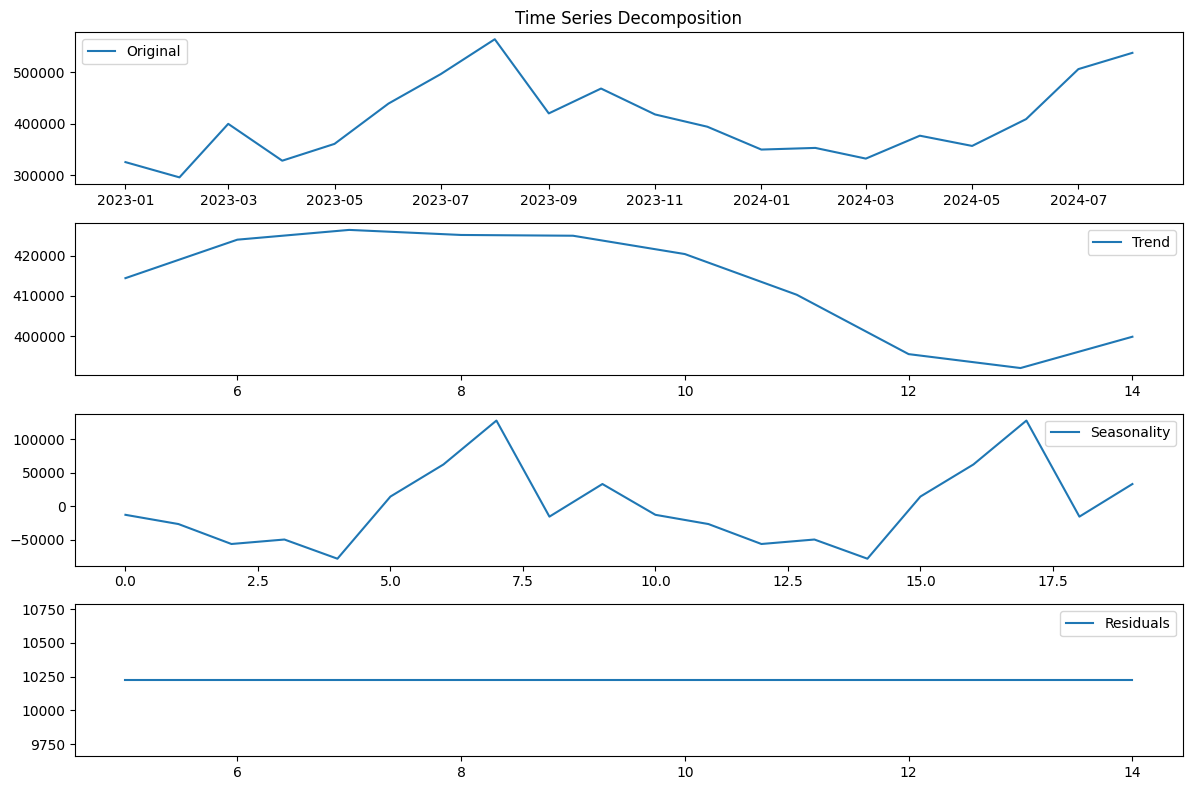

In [100]:
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(datos_spain['DATE'], datos_spain['SALES'], label='Original')
plt.legend(loc='best')
plt.title('Time Series Decomposition')

plt.subplot(412)
plt.plot(resultados.trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(resultados.seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(resultados.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Creo en mi humilde opinion que no hay ni una tendencia ni una estacionalidad marcada pero basicaente porque es un periodo de tiempo muy pequeño. Probablemente la tendencia sea sinusuidal, pero como he dicho antes, no se puede saber con certeza.

Aquí parece que los residuos son constantes o están cercanos a cero, lo cual es inusual, ya que generalmente los residuos muestran variación.

### La marca con más ventas

Al igual que antes, sabemos por el estudio anterior que la marca que ha tenido más ventas ha sido Pepsi Max.

Con esta información en mente, comenzamos con el mismo procedimiento que antes.

In [101]:
datos_pepsim = base_actual[base_actual['SUBBRAND'] == 'Pepsi Max (L3)']
datos_pepsim = datos_pepsim.drop(['FORECAST', 'FORECAST_YEAR'], axis=1)

# Convertimos las columnas 'YEAR' y 'MONTH' en una sola columna 'DATE'
datos_pepsim['DATE'] = pd.to_datetime(datos_pepsim['YEAR'].astype(str) + '-' + datos_pepsim['MONTH'].astype(str) + '-01')
display(datos_pepsim)

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,AMOUNT,DATE
277,Portugal,Pepsi Max (L3),2023,10,actual,1.885949e+05,2023-10-01
724,Denmark,Pepsi Max (L3),2024,2,actual,2.557571e+06,2024-02-01
727,Italy,Pepsi Max (L3),2024,2,actual,1.928897e+05,2024-02-01
740,Norway,Pepsi Max (L3),2024,2,actual,2.119033e+06,2024-02-01
836,Denmark,Pepsi Max (L3),2024,4,actual,2.090877e+06,2024-04-01
...,...,...,...,...,...,...,...
18302,Netherlands,Pepsi Max (L3),2024,3,actual,1.102766e+06,2024-03-01
18349,Great Britain,Pepsi Max (L3),2023,6,actual,1.277072e+07,2023-06-01
18535,Spain,Pepsi Max (L3),2023,2,actual,8.077250e+04,2023-02-01
18537,Hungary,Pepsi Max (L3),2023,2,actual,3.621544e+05,2023-02-01


In [102]:
# Modificamos nuestros datos para poder representarlos correctamente
datos_pepsim = datos_pepsim.sort_values(by='DATE')
datos_pepsim['COUNTRY_CODE'] = coco.convert(names=datos_pepsim['COUNTRY'], to='ISO3')


# Creamos el bubble map
fig = px.scatter_geo(datos_pepsim, locations="COUNTRY_CODE", locationmode='ISO-3',
                     color="AMOUNT", size="AMOUNT", hover_name="COUNTRY",
                     animation_frame="DATE",  # Animate by date
                     projection="natural earth", title="Ventas de Pepsi Max por país a través del tiempo",
                     color_continuous_scale=px.colors.sequential.Aggrnyl_r)

fig.show()

In [103]:
datos_pepsim = datos_pepsim.groupby(['DATE'])['AMOUNT'].sum().reset_index(name='SALES')

figurita = go.Figure()
figurita.add_trace(go.Scatter(x=datos_pepsim['DATE'], y=datos_pepsim['SALES'], mode='lines', name='Ventas'))

# Actualizar el diseño del gráfico
figurita.update_layout(
    title='Ventas en España',
    xaxis_title='Fecha',
    yaxis_title='Cantidades',
    template='plotly',
    showlegend=False
)


figurita.show()

Descomposición:

In [104]:
from statsmodels.tsa.seasonal import seasonal_decompose

resulta2 = seasonal_decompose(datos_pepsim['SALES'], model='additive', period=10)  # Assuming monthly seasonality


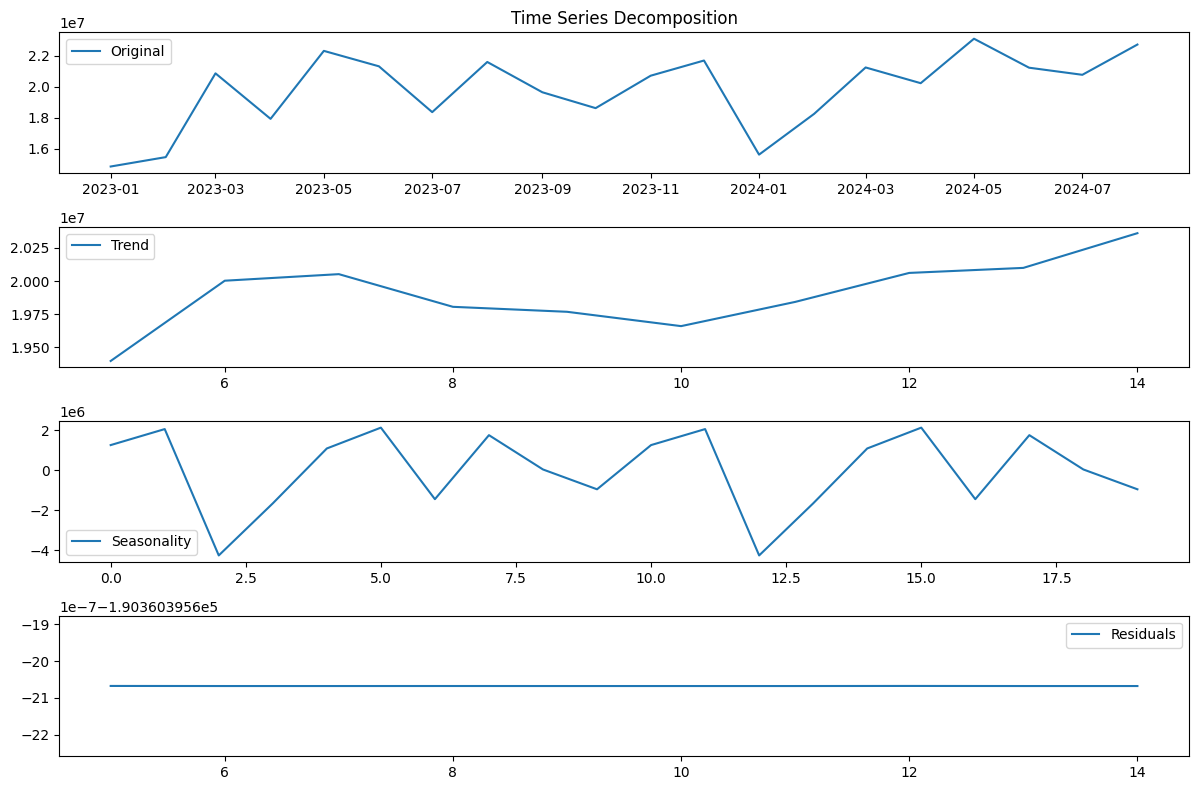

In [105]:

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(datos_pepsim['DATE'], datos_pepsim['SALES'], label='Original')
plt.legend(loc='best')
plt.title('Time Series Decomposition')

plt.subplot(412)
plt.plot(resulta2.trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(resulta2.seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(resulta2.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

CONCLUSIONES DE LOS GRÁFICOS

## 3

Por último, calcularemos las predicciones hechas para España y como de fiables son. Para esto, comenzaremos separando nuestros datos reales y nuestras predicciones.


In [106]:
predicciones_spain = predicciones[predicciones['COUNTRY'] == 'Spain']
predicciones_spain['DATE'] = pd.to_datetime(predicciones_spain['YEAR'].astype(str) + '-' + predicciones_spain['MONTH'].astype(str) + '-01')


reales_spain = df[(df['COUNTRY'] == 'Spain') & (df['SCENARIO'] == 'actual')]
reales_spain = reales_spain.drop(['FORECAST', 'FORECAST_YEAR'], axis=1)
reales_spain['DATE'] = pd.to_datetime(reales_spain['YEAR'].astype(str) + '-' + reales_spain['MONTH'].astype(str) + '-01')

<ipython-input-106-381e4273c8c5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Vamos a crear una variable para cada forecast y asi poder evaluarlos por separado.

In [107]:
forecas1 = predicciones_spain[predicciones_spain['FORECAST'] == 1]
forecas2 = predicciones_spain[predicciones_spain['FORECAST'] == 2]
forecas3 = predicciones_spain[predicciones_spain['FORECAST'] == 3]
forecas4 = predicciones_spain[predicciones_spain['FORECAST'] == 4]
forecas5 = predicciones_spain[predicciones_spain['FORECAST'] == 5]
forecas6 = predicciones_spain[predicciones_spain['FORECAST'] == 6]
forecas7 = predicciones_spain[predicciones_spain['FORECAST'] == 7]
forecas8 = predicciones_spain[predicciones_spain['FORECAST'] == 8]
forecas9 = predicciones_spain[predicciones_spain['FORECAST'] == 9]
forecas10 = predicciones_spain[predicciones_spain['FORECAST'] == 10]
forecas11 = predicciones_spain[predicciones_spain['FORECAST'] == 11]
forecas12 = predicciones_spain[predicciones_spain['FORECAST'] == 12]

Ahora graficamos

In [113]:
reales_spain_fecha = reales_spain.groupby('DATE')['AMOUNT'].sum().reset_index()

# Crear un subplot con 4 filas y 3 columnas
fig = make_subplots(
    rows=4, cols=3,
    subplot_titles=[f'Actual vs. Forecast {forecast_df["FORECAST"].iloc[0]}' for forecast_df in [forecas1, forecas2, forecas3, forecas4, forecas5, forecas6, forecas7, forecas8, forecas9, forecas10, forecas11, forecas12]]
)

# Función para graficar las previsiones y las ventas reales
def graficar_forecast_vs_actual(forecast_df, fig, row, col):
    forecast_sales = forecast_df.groupby('DATE')['AMOUNT'].sum().reset_index()

    # Graficar ventas reales
    fig.add_trace(go.Scatter(x=reales_spain_fecha['DATE'], y=reales_spain_fecha['AMOUNT'], mode='lines', name='Actual Sales'),
                  row=row, col=col)

    # Graficar previsión
    fig.add_trace(go.Scatter(x=forecast_sales['DATE'], y=forecast_sales['AMOUNT'], mode='lines', name=f'Forecast {forecast_df["FORECAST"].iloc[0]}'),
                  row=row, col=col)

# Iterar a través de cada conjunto de previsiones y agregarlo a los subgráficos
forecast_totales = [forecas1, forecas2, forecas3, forecas4, forecas5, forecas6, forecas7, forecas8, forecas9, forecas10, forecas11, forecas12]

for i, forecast_df in enumerate(forecast_totales):
    row = i // 3 + 1  # Calcular fila
    col = i % 3 + 1  # Calcular columna
    graficar_forecast_vs_actual(forecast_df, fig, row, col)

# Actualizar el diseño
fig.update_layout(
    height=1000,  # Ajustar la altura de la figura
    title_text="Actual vs. Forecast Sales",
    showlegend=True,
    template='plotly'
)

# Mostrar gráfico
fig.show()

Por los gráficos vemos que la mejor predicción es la del último mes, diciembre, o la de enero. Vamos a ver la comparación con las predicciones y las ventas reales de cada SUBBRAND para verificar cual es la mejor predicción.

In [119]:
def create_pie_chart(df, title, fig, row, col):
    sales_by_subbrand = df.groupby('SUBBRAND')['AMOUNT'].sum()
    labels = sales_by_subbrand.index
    sizes = sales_by_subbrand.values

    fig.add_trace(go.Pie(labels=labels, values=sizes, hole=0.3, name=title,
                         textinfo='percent+label', marker=dict(colors=px.colors.qualitative.Pastel2_r)),
                  row=row, col=col)

# Crear subgráficos
fig = make_subplots(rows=1, cols=3,
                    specs=[[{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}]])

# Crear gráficos
create_pie_chart(reales_spain, 'Ventas reales España', fig, 1, 1)
create_pie_chart(forecas1, 'Forecast 1', fig, 1, 2)
create_pie_chart(forecas12, 'Forecast 12', fig, 1, 3)

fig.update_layout(
    height=500,
    title_text="Distribución de Ventas por Submarca",
    showlegend=True
)

fig.show()

Como estos nuevos gráficos no nos ha resuelto ninguna duda vamos a ver cuan de buenas son las predicciones a través del cálculo de errores.

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Cortar la serie más larga para que coincidan las longitudes
min_length = min(len(reales_spain), len(forecas1))
reales_spain1 = reales_spain[:min_length]
forecas1 = forecas1[:min_length]


mae1 = mean_absolute_error(reales_spain1['AMOUNT'], forecas1['AMOUNT'])
mse1 = mean_squared_error(reales_spain1['AMOUNT'], forecas1['AMOUNT'])

In [111]:
# Cortar la serie más larga para que coincidan las longitudes
min_length2 = min(len(reales_spain), len(forecas12))
reales_spain2 = reales_spain[:min_length2]
forecas12 = forecas12[:min_length2]

# Calcular el MAE, MSE y MAPE para forecast2
mae2 = mean_absolute_error(reales_spain2['AMOUNT'], forecas12['AMOUNT'])
mse2 = mean_squared_error(reales_spain2['AMOUNT'], forecas12['AMOUNT'])

print(f"Forecast 1 - MAE: {mae1}, MSE: {mse1}")
print(f"Forecast 2 - MAE: {mae2}, MSE: {mse2}")



Forecast 1 - MAE: 47650.73676017018, MSE: 3685770334.7618103
Forecast 2 - MAE: 50455.011125463505, MSE: 3789497361.0876784


Vamos a compararlos de una forma más visual

In [128]:
metricas = ['Forecast 1', 'Forecast 2']
forecast1_mae = [mae1]
forecast2_mae = [mae2]

# Crear subgráficos
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=['Comparación MAE', 'Comparación MSE'],
                    specs=[[{'type': 'bar'}, {'type': 'bar'}]])

# Gráfico para MAE
fig.add_trace(go.Bar(
    x=metricas,
    y=forecast1_mae,
    name='Forecast 1',
    marker=dict(color='#E6A9E3')
), row=1, col=1)

fig.add_trace(go.Bar(
    x=metricas,
    y=forecast2_mae,
    name='Forecast 2',
    marker=dict(color='#A5D8D5')
), row=1, col=1)

# MSE
forecast1_mse = [mse1]
forecast2_mse = [mse2]

# Gráfico para MSE
fig.add_trace(go.Bar(
    x=metricas,
    y=forecast1_mse,
    name='Forecast 1',
    marker=dict(color='#E6A9E3')
), row=1, col=2)

fig.add_trace(go.Bar(
    x=metricas,
    y=forecast2_mse,
    name='Forecast 2',
    marker=dict(color='#A5D8D5')
), row=1, col=2)



fig.update_layout(
    height=600,
    width=1000,
    title_text="Comparación de Forecasts: MAE y MSE",
    showlegend=True
)
fig.show()


Como podemos ver ambas predicciones son igual de buenas, aunque la predicción del último mes es la mejor (lo cuál es de esperar).

En general, podemos decir que a pesar de los picos en los errores (reflejados en el MSE), el MAE sugiere que el modelo está funcionando bastante bien, y los errores son lo suficientemente pequeños como para considerarlo un buen modelo para la predicción de ventas millonarias.